In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import math
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns 

import env
from acquire import get_db_log_data
from wrangle import wrangle_df

In [2]:
#Acquire
df = get_db_log_data()
df.head(5)

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0


In [3]:
#prepare
df = wrangle_df(df)
df.head(5)

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
0,2018-01-26,2022-07-11 09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php
1,2018-01-26,2022-07-11 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php
2,2018-01-26,2022-07-11 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php
3,2018-01-26,2022-07-11 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php
4,2018-01-26,2022-07-11 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java


In [4]:
df.shape[1]

12

In [5]:
first_date = dt.datetime(2018, 12, 31)
second_date = dt.datetime(2020, 1, 1)

log_2019 = df[(df.date > first_date) & (df.date < second_date)]

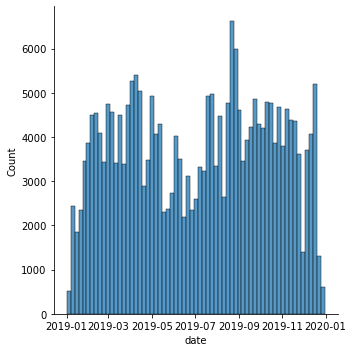

In [6]:
sns.displot(data = log_2019, x = log_2019.date);

In [7]:
df.program_id.unique()

array(['full_stack_php', 'full_stack_java', nan, 'front_end_programming',
       'data_science'], dtype=object)

In [8]:
df.program_id.isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
900218    False
900219    False
900220    False
900221    False
900222    False
Name: program_id, Length: 900223, dtype: bool

In [18]:
df.program_id.value_counts()

full_stack_java          713365
data_science             103412
full_stack_php            30548
front_end_programming         5
Name: program_id, dtype: int64

In [16]:
# Splitting the program ids into own dfs
java  = df[df.program_id == 'full_stack_java']
java.head()

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
4,2018-01-26,2022-07-11 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java
5,2018-01-26,2022-07-11 09:56:41,javascript-i/loops,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java
6,2018-01-26,2022-07-11 09:56:46,javascript-i/conditionals,3,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java
7,2018-01-26,2022-07-11 09:56:48,javascript-i/functions,3,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java
8,2018-01-26,2022-07-11 09:56:59,javascript-i/loops,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java


In [20]:
ds = df[df.program_id == 'data_science']
ds.head()

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
326053,2019-08-20,2022-07-11 09:39:58,/,466,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science
326054,2019-08-20,2022-07-11 09:39:59,/,467,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science
326055,2019-08-20,2022-07-11 09:39:59,/,468,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science
326056,2019-08-20,2022-07-11 09:40:02,/,469,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science
326057,2019-08-20,2022-07-11 09:40:08,/,470,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science


In [21]:
php = df[df.program_id == 'full_stack_php']
php.head()

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
0,2018-01-26,2022-07-11 09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php
1,2018-01-26,2022-07-11 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php
2,2018-01-26,2022-07-11 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php
3,2018-01-26,2022-07-11 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php
30,2018-01-26,2022-07-11 10:14:47,/,11,1.0,97.105.19.61,Arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php


In [23]:
frontend = df[df.program_id == 'front_end_programming']
frontend.head()

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
31627,2018-03-22,2022-07-11 19:01:49,/,152,9.0,207.68.209.17,Apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,front_end_programming
31628,2018-03-22,2022-07-11 19:01:54,content/html-css,152,9.0,207.68.209.17,Apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,front_end_programming
31629,2018-03-22,2022-07-11 19:01:54,content/html-css/gitbook/images/favicon.ico,152,9.0,207.68.209.17,Apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,front_end_programming
31630,2018-03-22,2022-07-11 19:02:47,content/html-css,152,9.0,207.68.209.17,Apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,front_end_programming
31631,2018-03-22,2022-07-11 19:02:52,content/html-css/introduction.html,152,9.0,207.68.209.17,Apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,front_end_programming


5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

7. Which lessons are least accessed?

Questions: What are we trying to answer here? Overall least accessed? By program? By cohort? All?

In [29]:
columns = [".md","studentx", "asdf", "home", "index.html", ".ico", "job-board", "selectors", "job-portal",
           "strings", "extra", "teams/13", "case-statements", "where", ".jpeg", ".png", ".xml", ".jpg",
           ".json", "https", ".html", "grades", "notes", "prework", "appendix", ".map", "capstones",
           "capstone", "wp-login", "'", "wp-admin"]

8. Anything else I should be aware of?